## Adiabatic Endothermic Reaction

You can download Fogler's book from here: https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

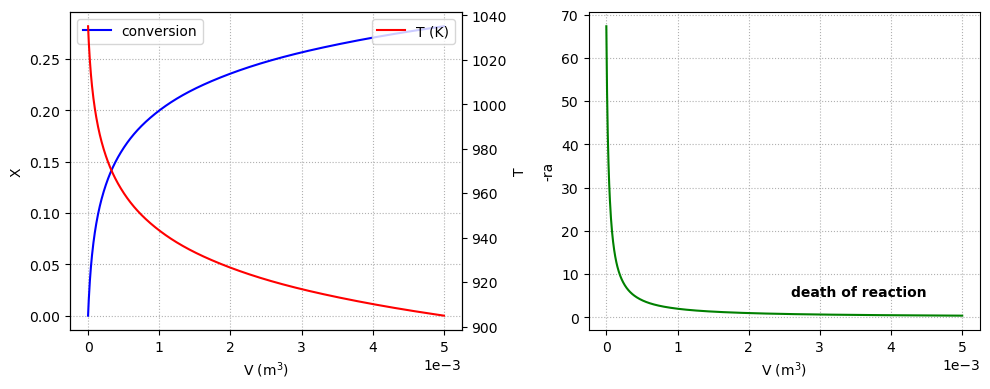

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define consant values
Fao = 0.0376
Cpa = 163
delCp = -9
Cao = 18.8
Cpc = 34.5
mc = 0.111 
Tref = 1035
Ta = 1250
Ua = 0 # since it is an adiabatic process

def odes (x, y, *args): 

    #assign each ODE (ordinary differential equation) to a vector element
    X = y[0]
    T = y[1]
    Ta = y[2]
    
    # explicit equation inline
    k = 3.58*np.exp(34222*(1/Tref-1/T))
    ra = -Cao*k*(1-X)*(Tref/T)/(1+X)
    deltaH = 80770 + delCp*(T-298)

    # define each ODE
    dxdV = -ra/Fao
    dTdV = (Ua*(Ta-T)+ra*deltaH)/(Fao*(Cpa+X*delCp))
    dTadV = Ua*(T-Ta)/mc/Cpc 

    return np.array([dxdV, dTdV, dTadV])

# initial conditions
x0 = np.array([0, Tref, Ta])

# declare a volume vector (volume window)
V = np.linspace(0, 0.005, 1000)

args = (Tref, Ua, Fao, mc)

# solution of the ode
sol = solve_ivp(odes, (0, V[-1]), x0, t_eval = V, args = args)

X, T, Ta = sol.y

k = 3.58*np.exp(34222*(1/Tref-1/T))

ra = -Cao*k*(1-X)*(Tref/T)/(1+X)

fig, ax = plt.subplots(ncols = 2, figsize = (10, 4), dpi = 100)

# plot X vs V
ax[0].plot(V, X, "b-", label = "conversion")
ax[0].set_ylabel("X")
ax[0].set_xlabel("V (m$^3$)")
ax[0].legend(facecolor='white')
ax[0].grid(linestyle='dotted')
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,3))

# plot T vs V
ax1b = ax[0].twinx()

ax1b.plot(V,T, "r-", label= "T (K)")
ax1b.set_ylabel("T")
ax1b.set_xlabel("V (m$^3$)")
ax1b.legend(facecolor='white')

# plot -ra vs V
ax[1].plot(V, -ra, "g-")
ax[1].set_ylabel("-ra")
ax[1].set_xlabel("V (m$^3$)")
ax[1].grid(linestyle='dotted')
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,3))
ax[1].text(0.0026, 5, 'death of reaction', weight = 'bold')

fig.tight_layout()